## APRIORI ALGORITHM TO FIND PATTERNS IN THE DATASET
Here is a dataset contaaining data on visits to an ecommerce site

**Attribute Information:**
The dataset contains both numerical and categorical attributes. The "Revenue" attribute is the class label, and it can be used to categorize sessions as either negative (did not result in shopping) or positive (resulted in shopping).

Numerical Attributes:
1. Administrative: The number of different types of administrative pages visited in the session.
2. Administrative Duration: Total time spent on administrative pages during the session.
3. Informational: The number of different types of informational pages visited in the session.
4. Informational Duration: Total time spent on informational pages during the session.
5. Product Related: The number of different types of product-related pages visited in the session.
6. Product Related Duration: Total time spent on product-related pages during the session.
7. Bounce Rate: The percentage of visitors who enter the site from a page and then leave without interacting further.
8. Exit Rate: The percentage of pageviews that were the last in the session.
9. Page Value: The average value for a web page that a user visited before completing an e-commerce transaction.
10. Special Day: Indicates the closeness of the site visiting time to a specific special day (e.g., holidays).

Categorical Attributes:
1. Operating System: The operating system used by the visitor.
2. Browser: The web browser used by the visitor.
3. Region: The region of the visitor.
4. Traffic Type: The type of traffic source.
5. Visitor Type: Whether the visitor is returning or a new visitor.
6. Weekend: A Boolean value indicating whether the date of the visit is a weekend.
7. Month: The month of the year.

**Additional Information:**
- The dataset contains 12,330 sessions.
- 84.5% (10,422) of the sessions are negative class samples, meaning they did not result in shopping.
- The remaining 15.5% (1,908) of the sessions are positive class samples, meaning they resulted in shopping.


### Problem Statement

To find patterns in the dataset for each categorical variable.

The Apriori algorithm is a fundamental method used in data mining and machine learning to find frequent itemsets in a dataset. It's often used in market basket analysis to discover relationships between items purchased together. 
Here's a mathematical explanation in simple terms:

1. **Itemset**: An itemset is a collection of one or more items. For example, in a supermarket dataset, an itemset could be {bread, milk} representing the purchase of both bread and milk together.

2. **Support**: Support is a measure of how frequently an itemset appears in the dataset. It's calculated as the number of times the itemset appears divided by the total number of transactions in the dataset. In simple terms, it tells you how often an itemset occurs.

   ```
   Support(Itemset) = (Number of Transactions containing Itemset) / (Total Number of Transactions)
   ```

3. **Frequent Itemset**: An itemset is considered "frequent" if its support is above a certain threshold (minimum support threshold). In other words, it's an itemset that appears frequently enough in the dataset.

4. **Apriori Principle**: This is a crucial concept in the Apriori algorithm. It states that if an itemset is frequent, then all of its subsets must also be frequent. In simpler terms, if people often buy {bread, milk}, it implies that they also often buy {bread} and {milk} separately.

5. **Association Rule**: An association rule is a relationship between two itemsets. For example, if we often see {bread} => {milk}, it means that when people buy bread, they tend to buy milk as well.

6. **Confidence**: Confidence measures the strength of an association rule. It's calculated as the support of the itemset containing both items divided by the support of the itemset on the left side (antecedent).

   ```
   Confidence(A => B) = Support(A and B) / Support(A)
   ```

7. **Apriori Algorithm Steps**:

   - Start with individual items as 1-item frequent itemsets.
   - Generate candidate itemsets of size (k+1) from frequent itemsets of size k, where k starts at 1 and increases.
   - Prune (remove) candidate itemsets that have subsets that are not frequent based on the Apriori principle.
   - Calculate the support of remaining candidate itemsets.
   - Keep only those itemsets that meet the minimum support threshold as frequent.
   - Repeat the process until no more frequent itemsets can be found.

In simpler terms, the Apriori algorithm helps us discover which combinations of items frequently appear together in a dataset. It does this by gradually building up larger itemsets from smaller ones and checking their support to see if they are frequent. This helps businesses understand customer buying patterns and can be used for things like product recommendations and optimizing store layouts.

In [22]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [23]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [24]:
# List of columns to convert to categorical
cat_to_cat = ['SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']

# Convert the specified columns to categorical
df[cat_to_cat] = df[cat_to_cat].astype('category')

# Find the object-type columns
object_cols = df.select_dtypes(include='object').columns

# Convert object-type columns to categorical
df[object_cols] = df[object_cols].astype('category')

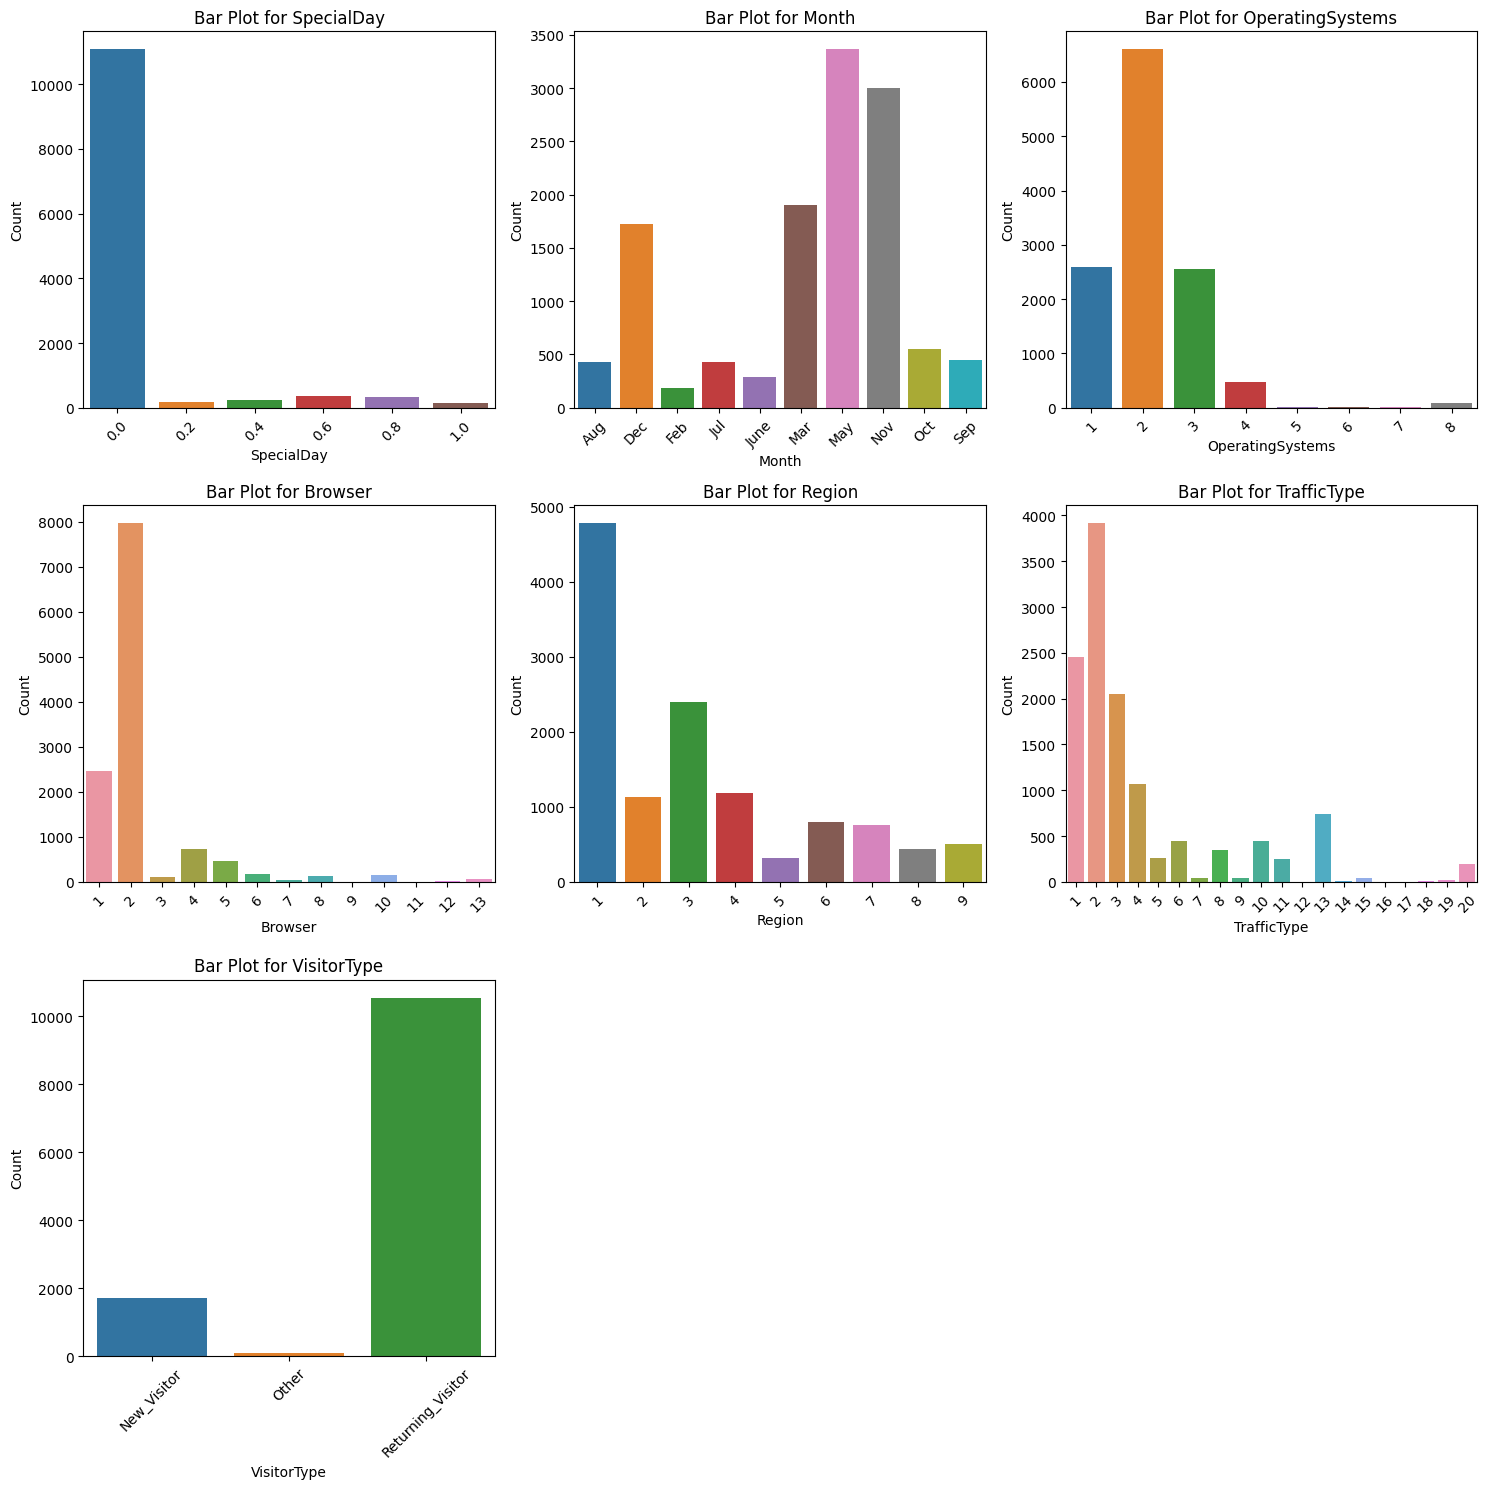

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Separate categorical columns
categorical_cols = df.select_dtypes(include='category').columns

# Determine the number of rows needed based on the number of categorical columns
num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots for the entire grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to iterate over categorical columns
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Create a bar plot for the current categorical column
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Bar Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots, if any
for i in range(len(categorical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of plots
plt.show()


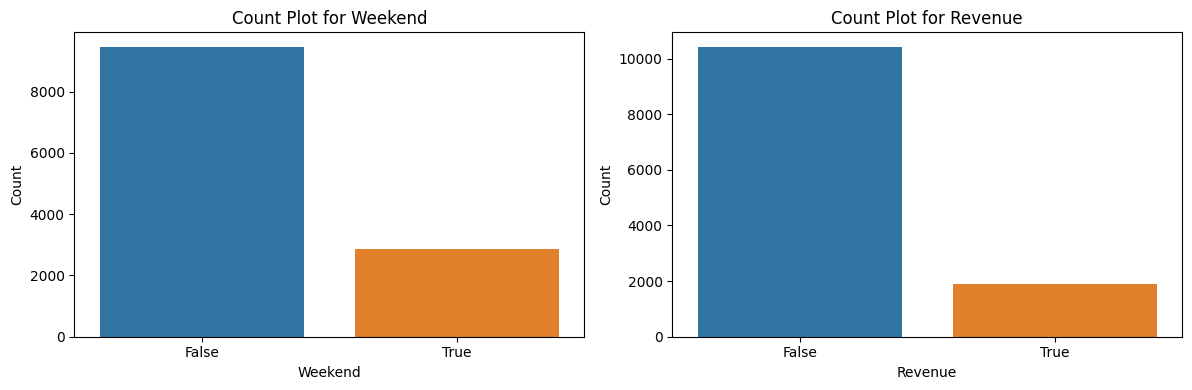

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Find the boolean (bool) columns
bool_cols = df.select_dtypes(include=bool).columns

# Determine the number of rows and columns for the grid
num_cols = 3  # You can adjust this to your desired number of columns
num_rows = (len(bool_cols) + num_cols - 1) // num_cols

# Define the height of the plots (adjust as needed)
plot_height = 4

# Calculate the overall figsize based on the number of rows, columns, and plot height
fig_width = num_cols * plot_height * 1.5  # Adjust the multiplier as needed
fig_height = num_rows * plot_height

# Create subplots for the entire grid with the adjusted figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to iterate over boolean columns
axes = axes.ravel()

for i, col in enumerate(bool_cols):
    # Create a count plot for the current boolean column
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

# Remove any empty subplots, if the number of boolean columns is not a multiple of num_cols
for i in range(len(bool_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of count plots
plt.show()

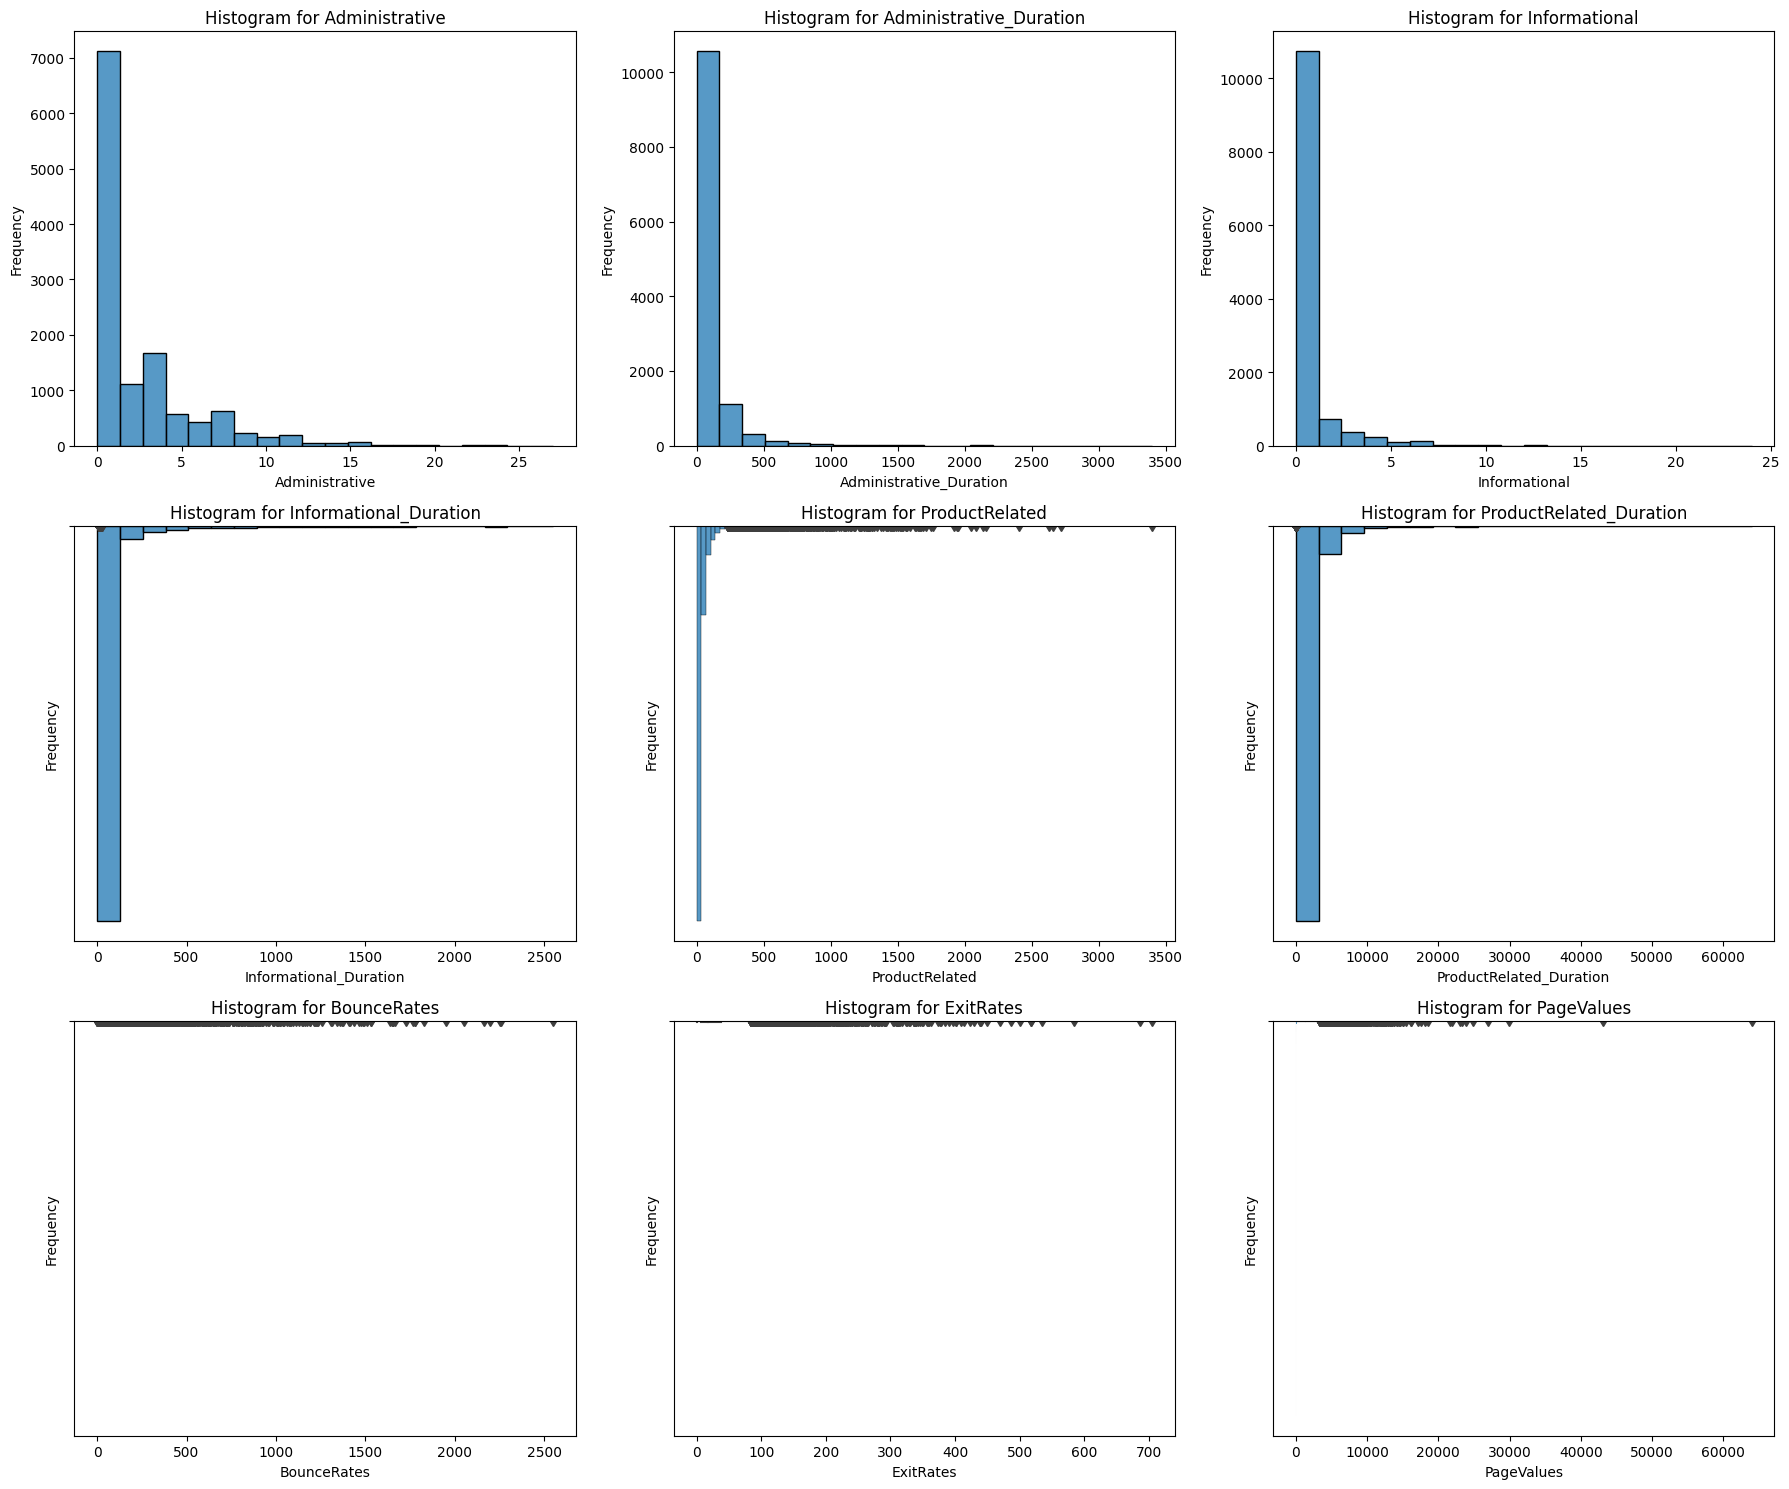

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Select numerical (int and float) columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed based on the number of columns and the desired 3 columns per row
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots for the entire grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Flatten the axes array to iterate over numerical columns
axes = axes.ravel()

# Generate histograms and box plots for numerical columns
for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(data=df, x=col, ax=axes[i], bins=20)  # Adjust the number of bins as needed
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Box Plot
    if i + num_cols < len(numerical_cols):
        sns.boxplot(data=df, x=col, ax=axes[i + num_cols], orient='h')
        axes[i + num_cols].set_title(f'Box Plot for {col}')
        axes[i + num_cols].set_xlabel(col)

# Remove any empty subplots, if the number of numerical columns is not a multiple of num_cols
for i in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of plots
plt.show()


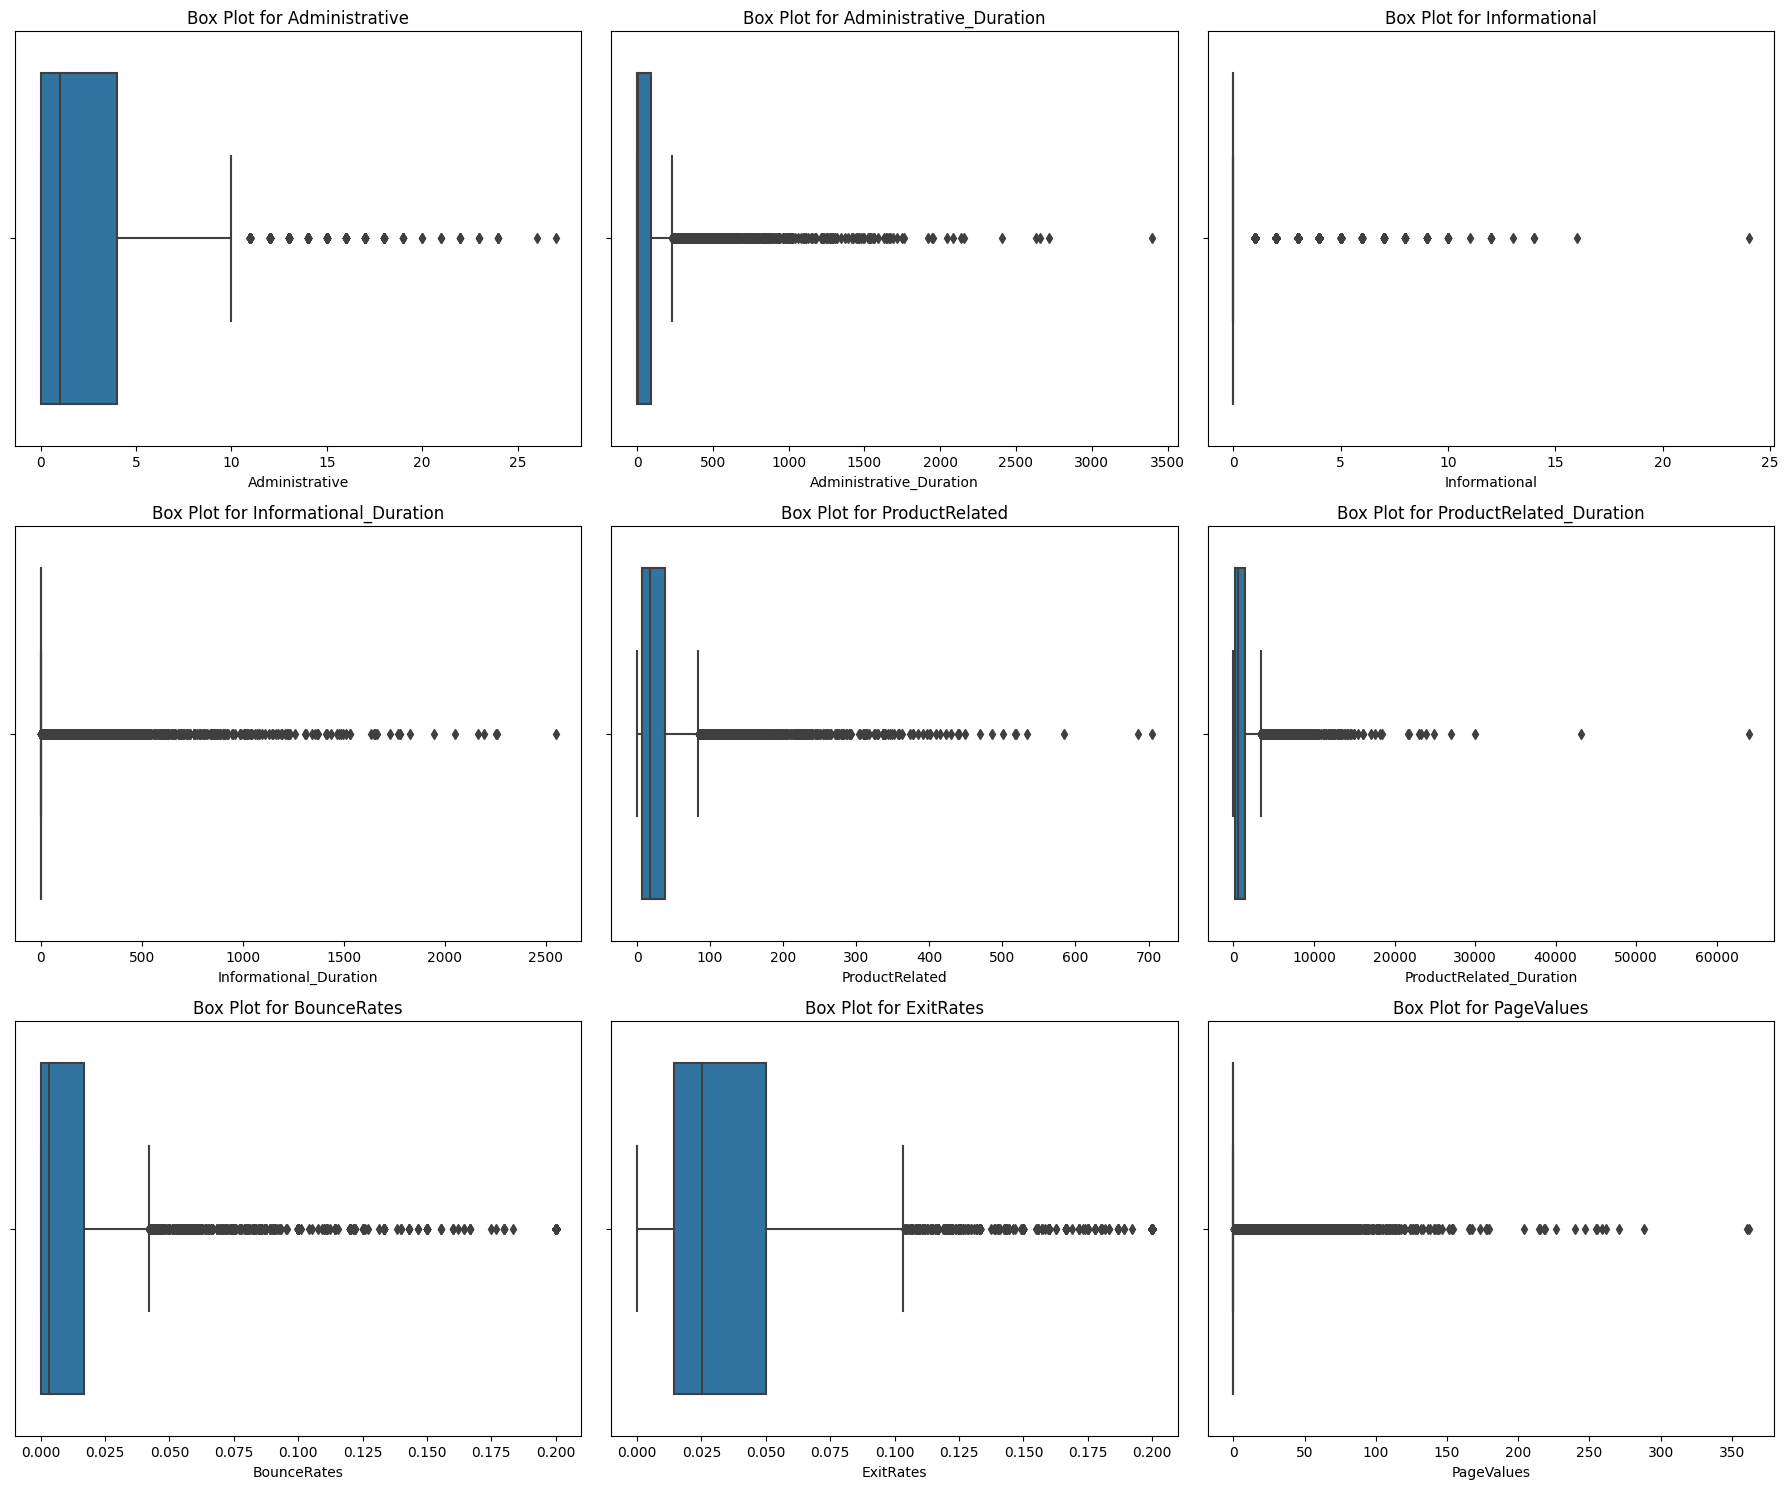

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Select numerical (int and float) columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed based on the number of columns and the desired 3 columns per row
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots for the entire grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Flatten the axes array to iterate over numerical columns
axes = axes.ravel()

# Generate box plots for numerical columns
for i, col in enumerate(numerical_cols):
    # Box Plot
    sns.boxplot(data=df, x=col, ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)

# Remove any empty subplots, if the number of numerical columns is not a multiple of num_cols
for i in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of box plots
plt.show()

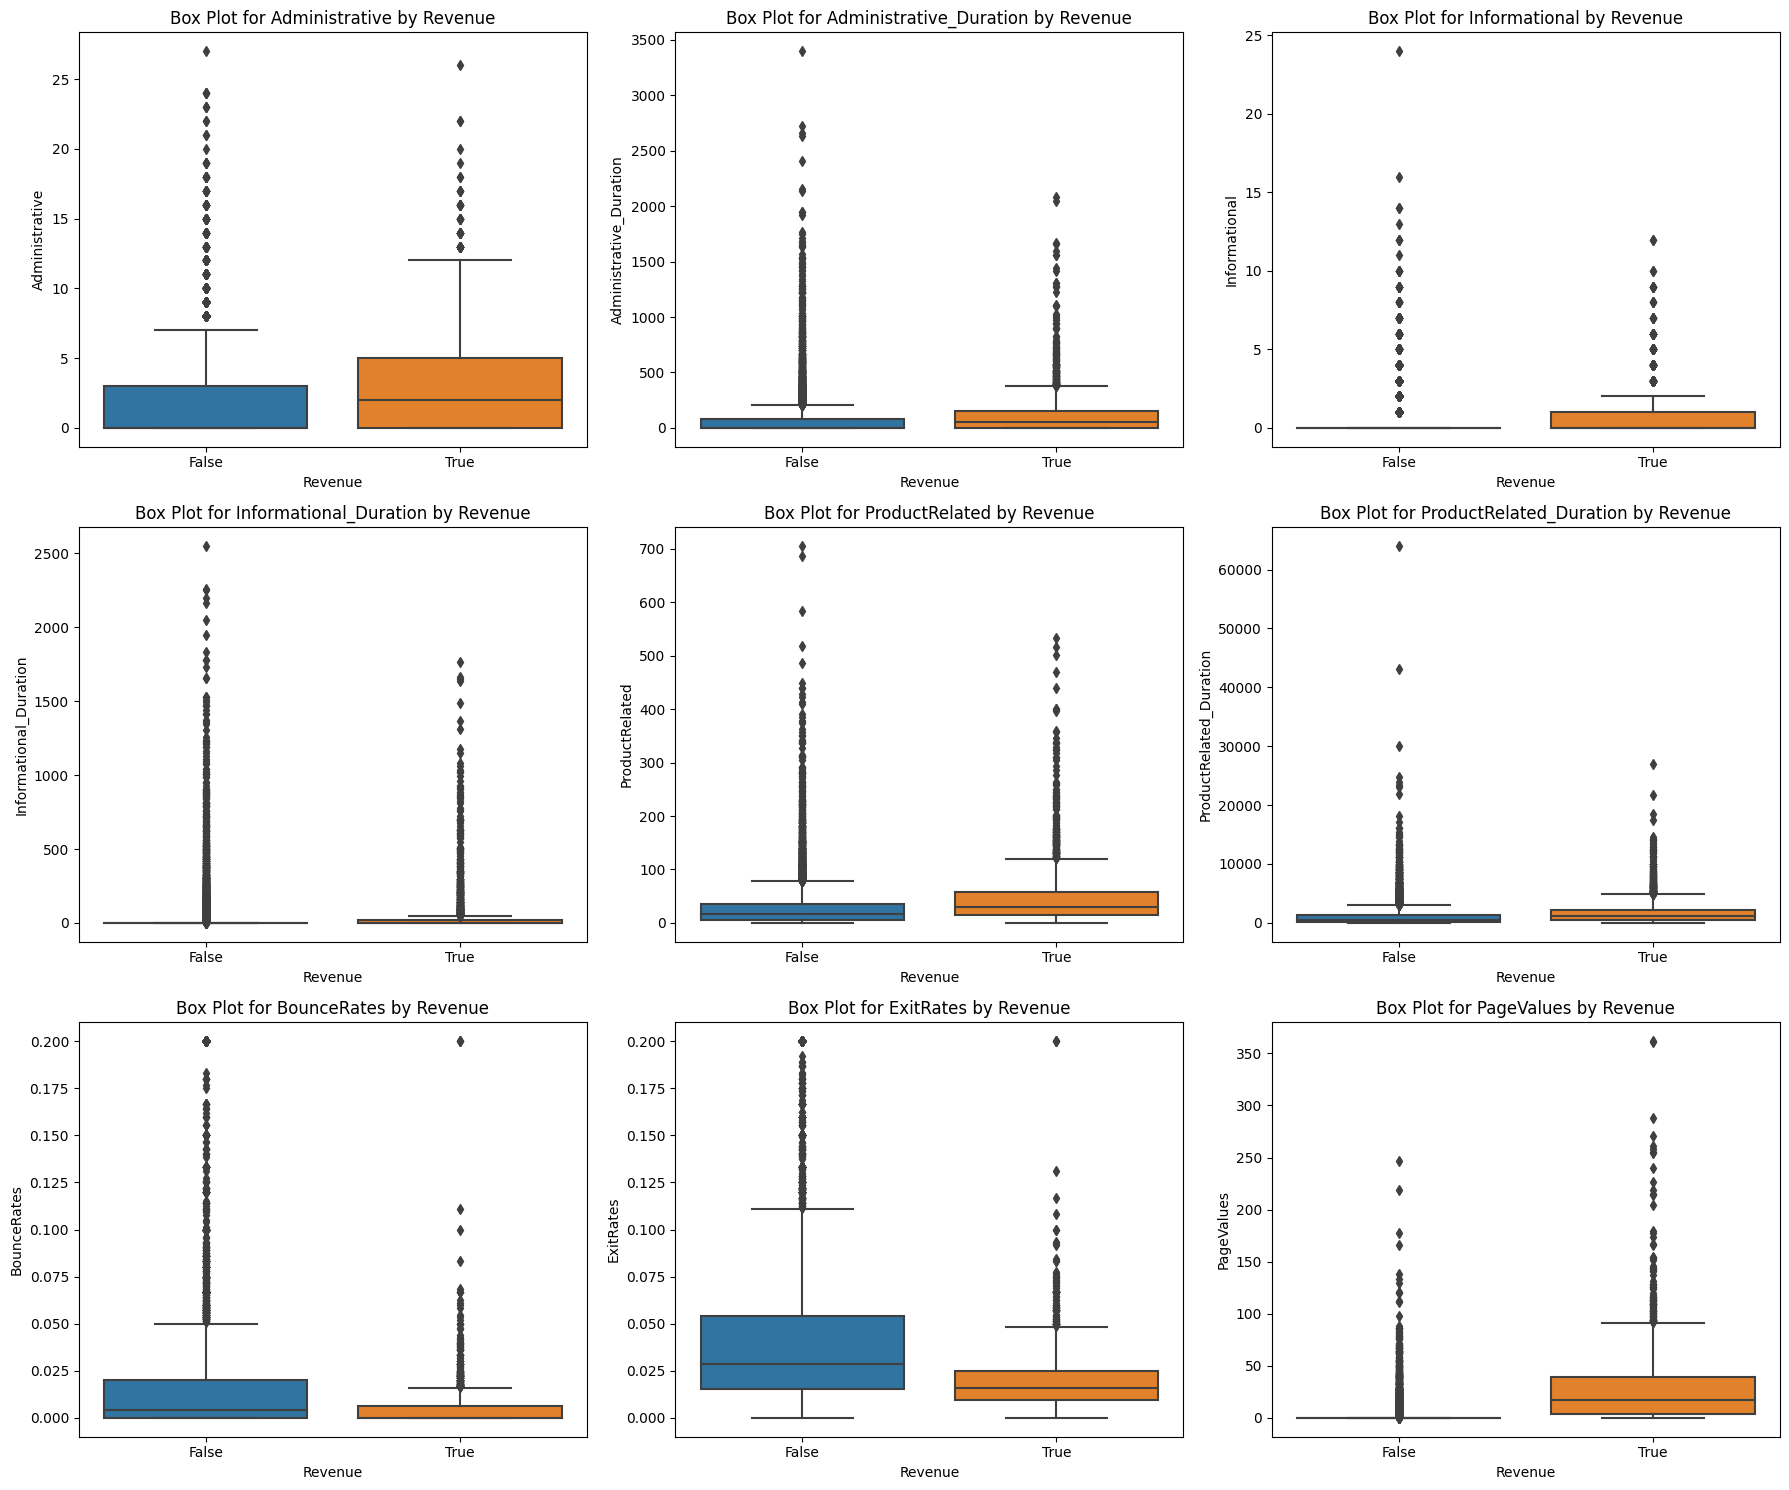

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Select numerical (int and float) columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed based on the number of columns and the desired 3 columns per row
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots for the entire grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Flatten the axes array to iterate over numerical columns
axes = axes.ravel()

# Iterate through numerical columns
for i, col in enumerate(numerical_cols):
    # Create a box plot categorized by 'Revenue'
    sns.boxplot(data=df, x='Revenue', y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col} by Revenue')
    axes[i].set_xlabel('Revenue')
    axes[i].set_ylabel(col)

# Remove any empty subplots, if the number of numerical columns is not a multiple of num_cols
for i in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of box plots
plt.show()

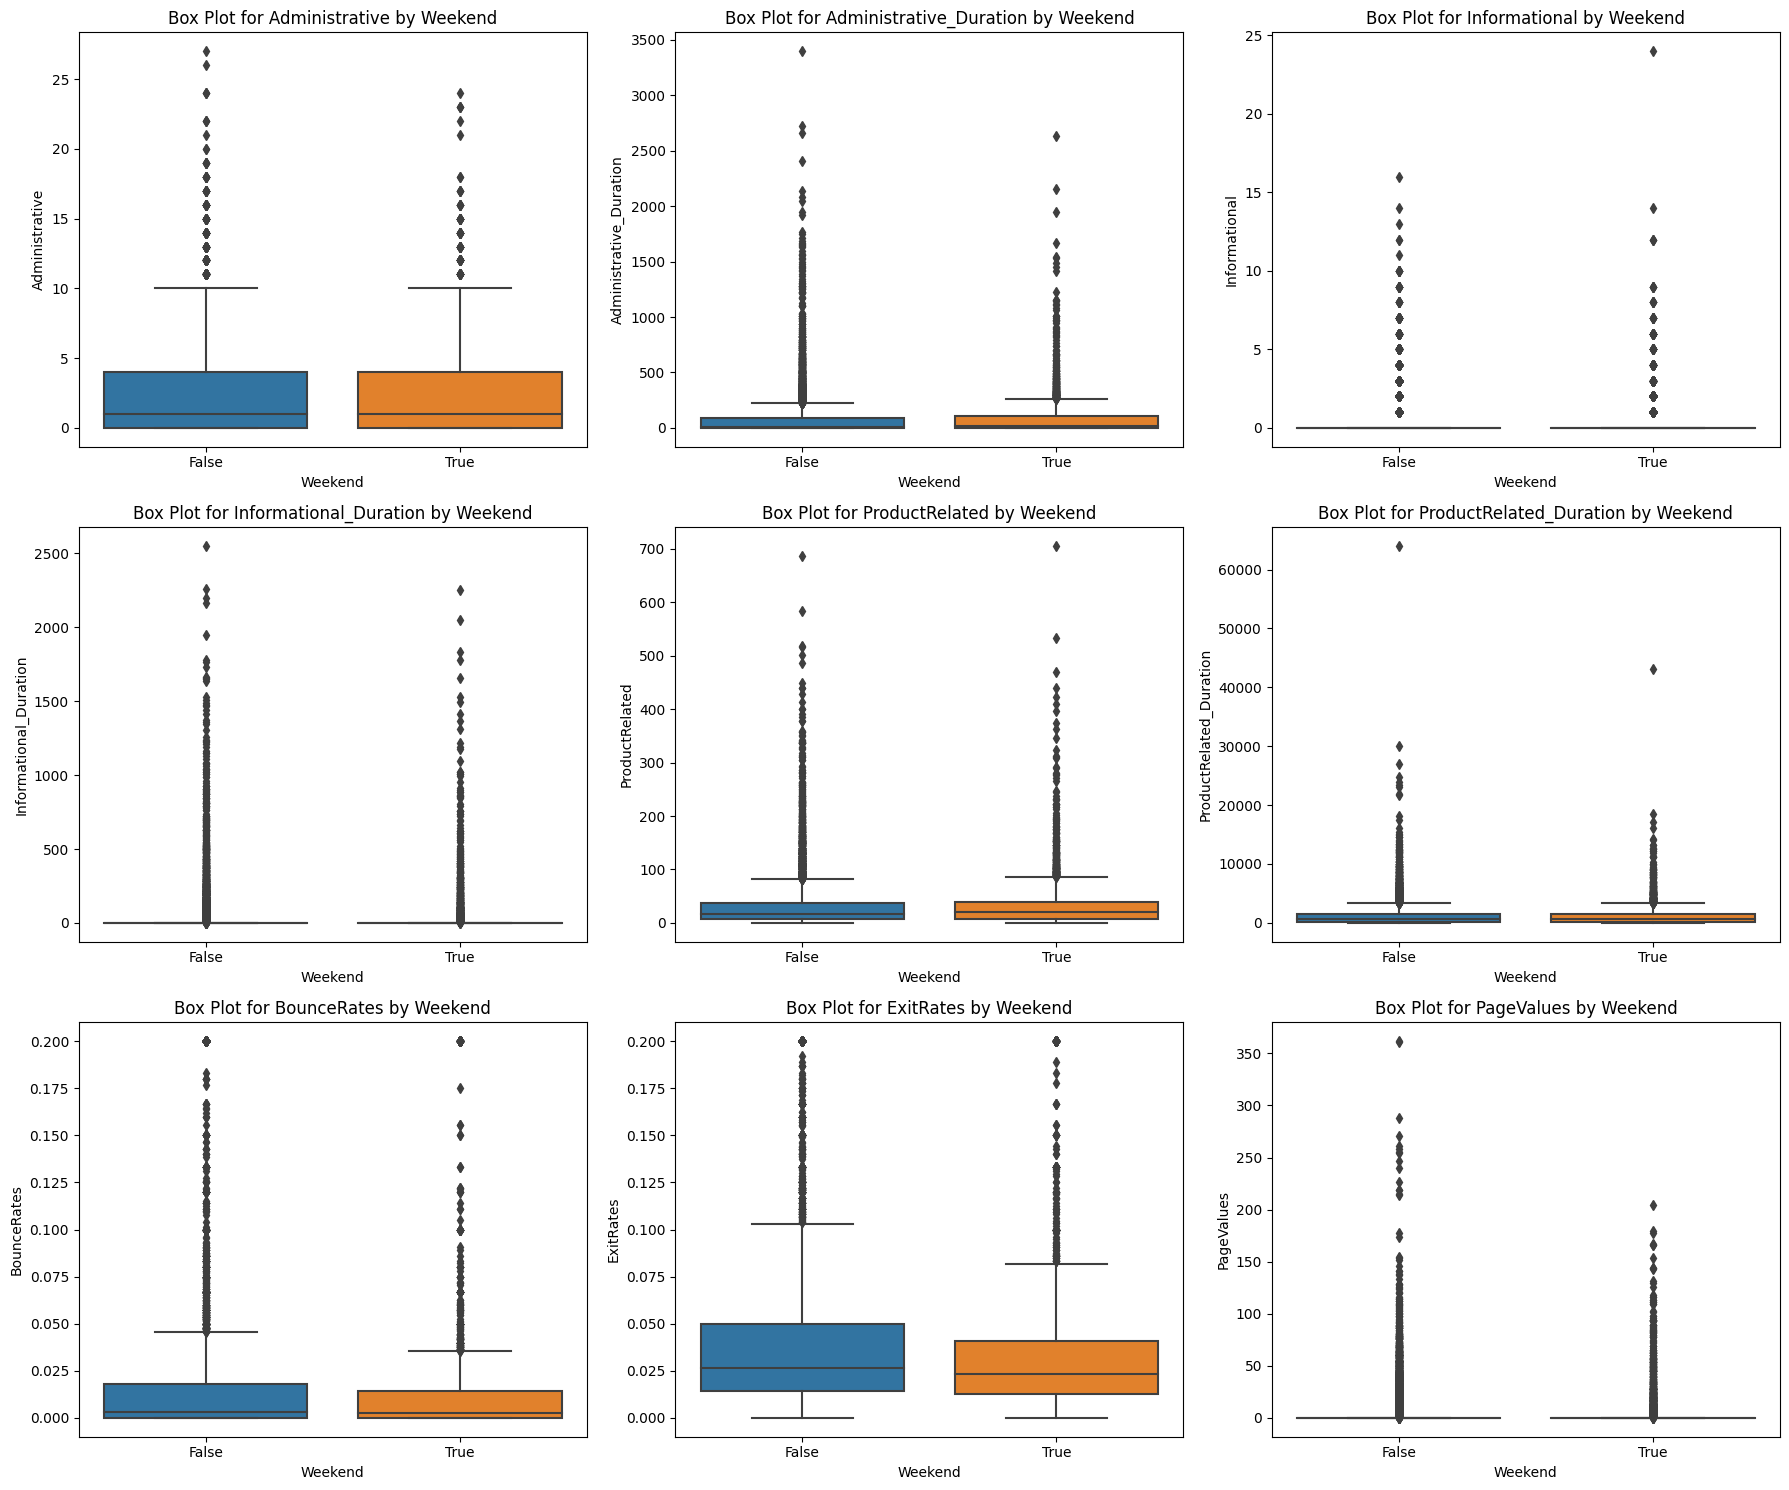

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Select numerical (int and float) columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed based on the number of columns and the desired 3 columns per row
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots for the entire grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Flatten the axes array to iterate over numerical columns
axes = axes.ravel()

# Iterate through numerical columns
for i, col in enumerate(numerical_cols):
    # Create a box plot categorized by 'Weekend'
    sns.boxplot(data=df, x='Weekend', y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col} by Weekend')
    axes[i].set_xlabel('Weekend')
    axes[i].set_ylabel(col)

# Remove any empty subplots, if the number of numerical columns is not a multiple of num_cols
for i in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of box plots
plt.show()

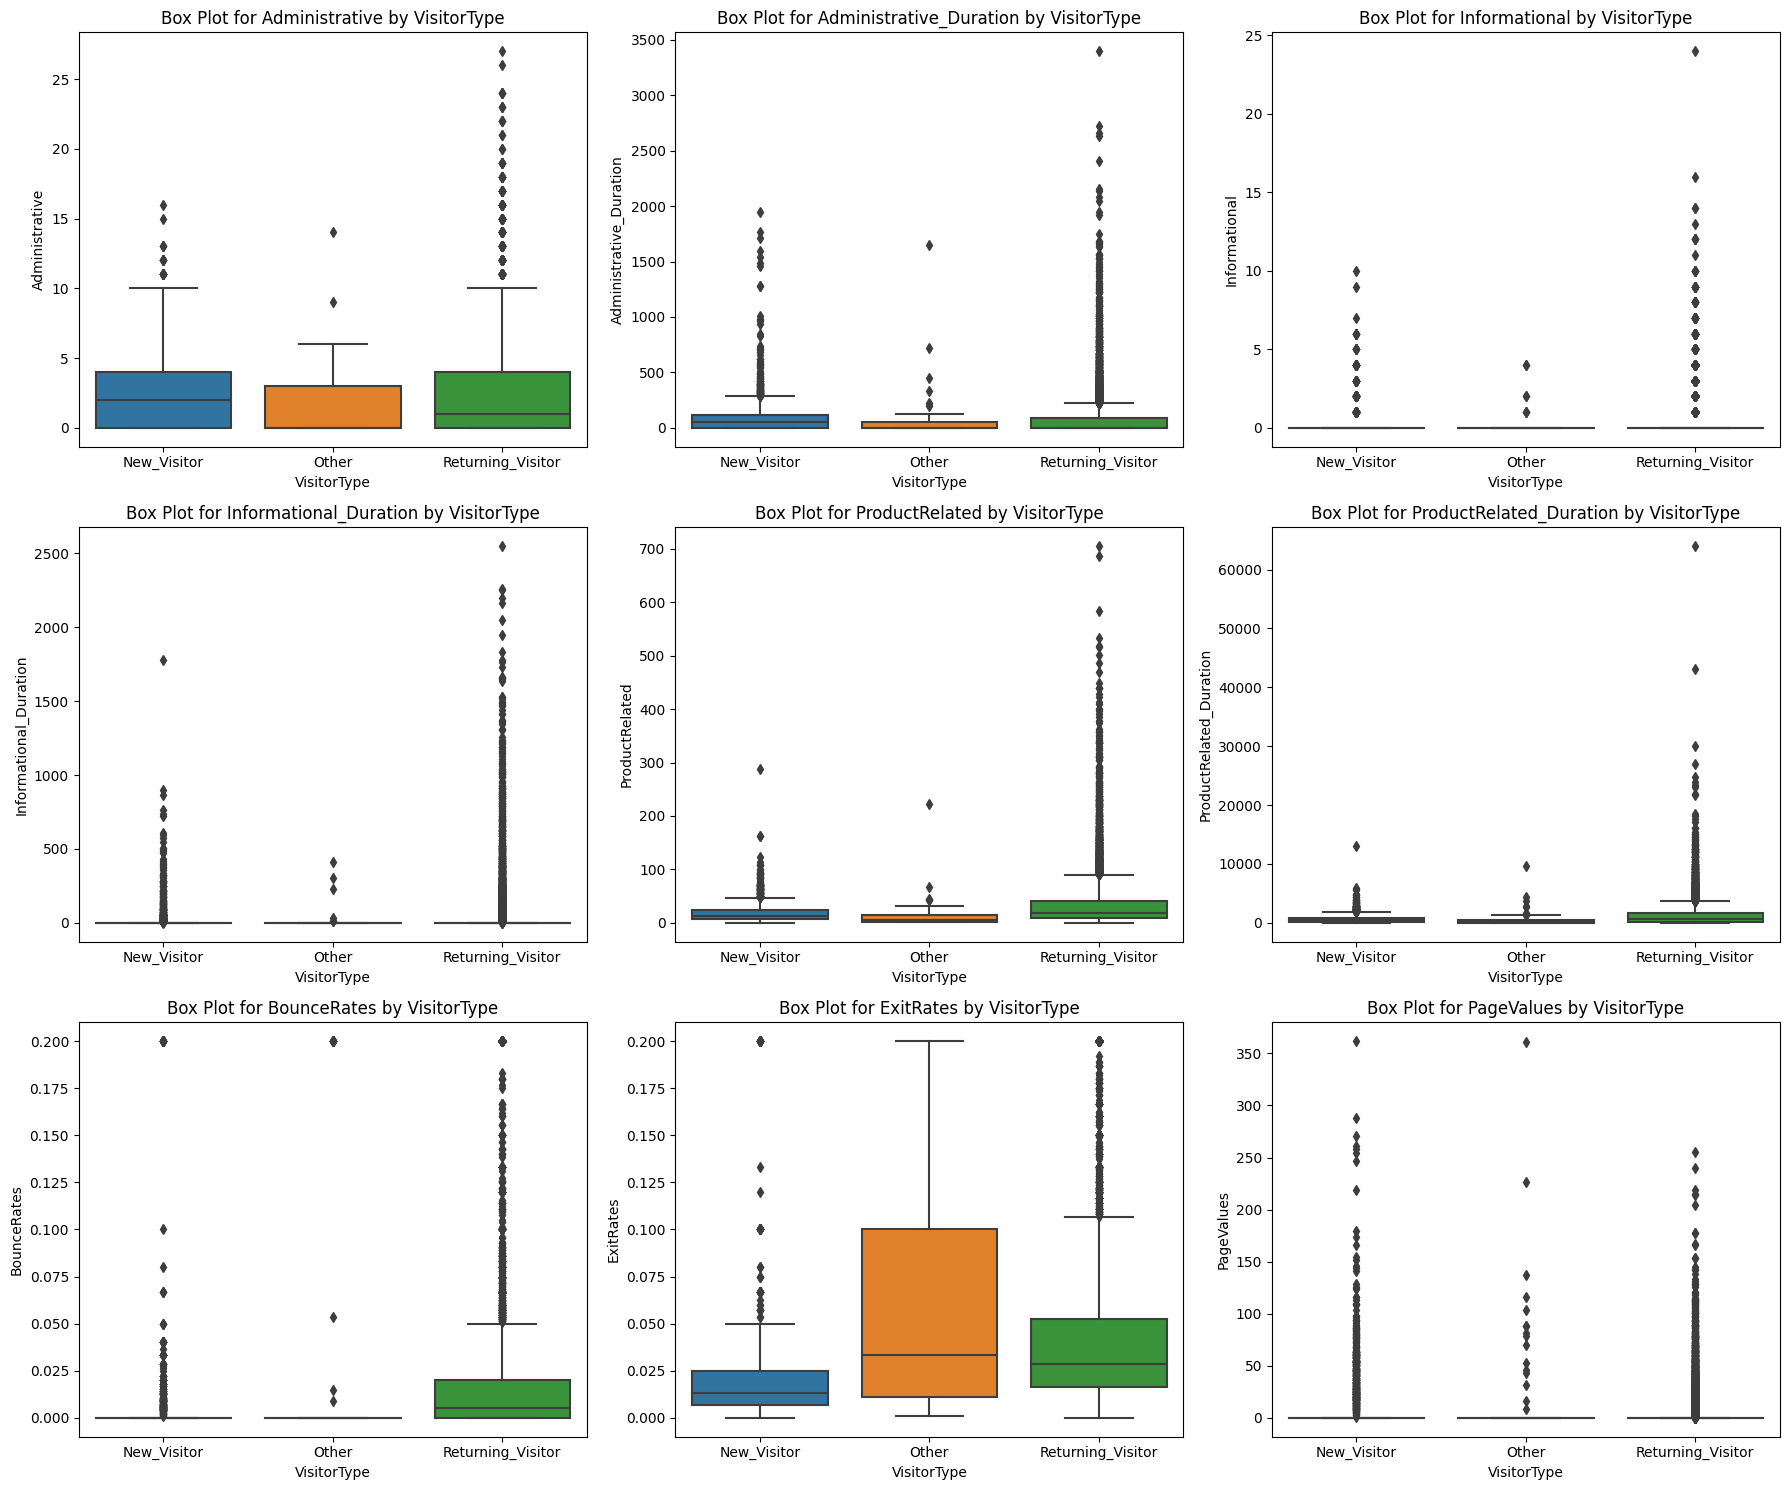

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Select numerical (int and float) columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed based on the number of columns and the desired 3 columns per row
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots for the entire grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Flatten the axes array to iterate over numerical columns
axes = axes.ravel()

# Iterate through numerical columns
for i, col in enumerate(numerical_cols):
    # Create a box plot categorized by 'VisitorType'
    sns.boxplot(data=df, x='VisitorType', y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col} by VisitorType')
    axes[i].set_xlabel('VisitorType')
    axes[i].set_ylabel(col)

# Remove any empty subplots, if the number of numerical columns is not a multiple of num_cols
for i in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire grid of box plots
plt.show()

In [32]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


In [33]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.0,12330,12330.0,12330.0,12330.0,12330.0,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10,8.0,13.0,9.0,20.0,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,May,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11079.0,3364,6601.0,7961.0,4780.0,3913.0,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
categorical_cols = df.select_dtypes(include='category').columns.tolist()
print(categorical_cols)

['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']


In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']


In [36]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you have a column 'Revenue' containing boolean values (0 or 1)
# Convert 'Revenue' to a string type to use it in Apriori
#df['Revenue'] = df['Revenue'].astype(str)
categorical_cols = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

In [37]:
# Binarize numerical columns
# Select only the categorical columns
categorical_cols = df[categorical_cols]
# Convert categorical data into binary format (one-hot encoding)
df_encoded = pd.get_dummies(categorical_cols)


In [38]:
# Run Apriori to find frequent itemsets based on the encoded data
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
      support                                           itemsets
0    0.232603                                          (Weekend)
1    0.898540                                   (SpecialDay_0.0)
2    0.140065                                        (Month_Dec)
3    0.154663                                        (Month_Mar)
4    0.272830                                        (Month_May)
..        ...                                                ...
367  0.081833  (SpecialDay_0.0, VisitorType_Returning_Visitor...
368  0.100162  (SpecialDay_0.0, TrafficType_2, VisitorType_Re...
369  0.051825  (SpecialDay_0.0, Region_1, TrafficType_2, Visi...
370  0.057745  (SpecialDay_0.0, Region_1, VisitorType_Returni...
371  0.060827  (SpecialDay_0.0, Region_1, TrafficType_2, Visi...

[372 rows x 2 columns]

Association Rules:
                                         antecedents  \
0                                   (SpecialDay_0.0)   
1                                          (W

In [44]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'df_encoded' contains the one-hot encoded data from the previous steps

# Set minimum support threshold (adjust as needed)
min_support = 0.05

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Display frequent itemsets
print("Frequent Itemsets:")


frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.232603,(Weekend)
1,0.898540,(SpecialDay_0.0)
2,0.140065,(Month_Dec)
3,0.154663,(Month_Mar)
4,0.272830,(Month_May)
...,...,...
367,0.081833,"(SpecialDay_0.0, VisitorType_Returning_Visitor..."
368,0.100162,"(SpecialDay_0.0, TrafficType_2, VisitorType_Re..."
369,0.051825,"(SpecialDay_0.0, Region_1, TrafficType_2, Visi..."
370,0.057745,"(SpecialDay_0.0, Region_1, VisitorType_Returni..."


In [46]:
# Display association rules with key metrics
print("\nAssociation Rules:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Association Rules:


,antecedents,consequents,support,confidence,lift
0,(SpecialDay_0.0),(Weekend),0.219627,0.244426,1.050829
1,(Weekend),(SpecialDay_0.0),0.219627,0.944212,1.050829
2,(Month_Nov),(Weekend),0.064152,0.263843,1.134302
3,(Weekend),(Month_Nov),0.064152,0.275802,1.134302
4,(Weekend),(OperatingSystems_1),0.059935,0.257671,1.229045
...,...,...,...,...,...
1819,"(VisitorType_Returning_Visitor, TrafficType_2)","(SpecialDay_0.0, Browser_2, Region_1)",0.060827,0.252866,1.137481
1820,(SpecialDay_0.0),"(VisitorType_Returning_Visitor, Browser_2, Reg...",0.060827,0.067696,1.051243
1821,(Region_1),"(SpecialDay_0.0, VisitorType_Returning_Visitor...",0.060827,0.156904,1.067673
1822,(TrafficType_2),"(SpecialDay_0.0, VisitorType_Returning_Visitor...",0.060827,0.191669,1.000964


In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'df_encoded' contains the one-hot encoded data from the previous steps

# Set minimum support threshold (adjust as needed)
min_support = 0.05

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Define the file path where you want to save the results
output_file_path = 'apriori_results.txt'

# Open the file in write mode and write the results
with open(output_file_path, 'w') as output_file:
    # Write frequent itemsets to the file
    output_file.write("Frequent Itemsets:\n")
    output_file.write(frequent_itemsets.to_string(index=False) + '\n\n')

    # Write association rules to the file
    output_file.write("Association Rules:\n")
    output_file.write(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))

print(f"Results have been saved to '{output_file_path}'.")

Results have been saved to 'apriori_results.txt'.


In [54]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'df_encoded' contains the one-hot encoded data from the previous steps

# Set minimum support threshold (adjust as needed)
min_support = 0.05

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Sort rules by a specific metric (e.g., lift) in descending order
sorted_rules = rules.sort_values(by='lift', ascending=False)

# Print the top 100 rules
top_10_rules = sorted_rules.head(100)


In [56]:
# Set options to display all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [57]:
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1048,"(Browser_1, TrafficType_2)","(SpecialDay_0.0, OperatingSystems_1)",0.069586,0.192376,0.059205,0.850816,4.422664,0.045818,5.413602,0.831772
1045,"(SpecialDay_0.0, OperatingSystems_1)","(Browser_1, TrafficType_2)",0.192376,0.069586,0.059205,0.307757,4.422664,0.045818,1.344057,0.958233
1049,"(TrafficType_2, OperatingSystems_1)","(SpecialDay_0.0, Browser_1)",0.074371,0.182482,0.059205,0.796074,4.362486,0.045634,4.008900,0.832702
1044,"(SpecialDay_0.0, Browser_1)","(TrafficType_2, OperatingSystems_1)",0.182482,0.074371,0.059205,0.324444,4.362486,0.045634,1.370174,0.942820
1052,(OperatingSystems_1),"(SpecialDay_0.0, Browser_1, TrafficType_2)",0.209651,0.065693,0.059205,0.282398,4.298732,0.045432,1.301985,0.970930
1041,"(SpecialDay_0.0, Browser_1, TrafficType_2)",(OperatingSystems_1),0.065693,0.209651,0.059205,0.901235,4.298732,0.045432,8.002281,0.821329
588,(OperatingSystems_1),"(Browser_1, TrafficType_2)",0.209651,0.069586,0.062693,0.299033,4.297291,0.048104,1.327328,0.970831
585,"(Browser_1, TrafficType_2)",(OperatingSystems_1),0.069586,0.209651,0.062693,0.900932,4.297291,0.048104,7.977873,0.824682
1395,(Browser_1),"(VisitorType_Returning_Visitor, Region_1, Oper...",0.199676,0.072182,0.060908,0.305037,4.225956,0.046495,1.335061,0.953822
1388,"(VisitorType_Returning_Visitor, Region_1, Oper...",(Browser_1),0.072182,0.199676,0.060908,0.843820,4.225956,0.046495,5.124379,0.822755


## Interpretations


1. Rule 1048: (Browser_1, TrafficType_2) -> (SpecialDay_0.0, OperatingSystems_1)
   - Interpretation: Visitors using Browser 1 and TrafficType 2 are likely to visit on a non-special day (SpecialDay_0.0) and use OperatingSystems_1.
   - No direct insight into revenue, weekend, or visitor type in this rule.

2. Rule 1045: (SpecialDay_0.0, OperatingSystems_1) -> (Browser_1, TrafficType_2)
   - Interpretation: When it's not a special day (SpecialDay_0.0) and users are on OperatingSystems_1, they tend to use Browser_1 and TrafficType_2.
   - No direct insight into revenue, weekend, or visitor type in this rule.

3. Rule 1049: (TrafficType_2, OperatingSystems_1) -> (SpecialDay_0.0, Browser_1)
   - Interpretation: When users use TrafficType_2 and OperatingSystems_1, they tend to visit on a non-special day (SpecialDay_0.0) and use Browser_1.
   - No direct insight into revenue, weekend, or visitor type in this rule.

4. Rule 1052: (OperatingSystems_1) -> (SpecialDay_0.0, Browser_1, TrafficType_2)
   - Interpretation: Users on OperatingSystems_1 tend to visit on a non-special day (SpecialDay_0.0) and use Browser_1 and TrafficType_2.
   - No direct insight into revenue, weekend, or visitor type in this rule.


5. Rule 1055: (SpecialDay_0.0, VisitorType_Returning_Visitor, OperatingSystems_1) -> (Browser_1)
   - Interpretation: Returning visitors using OperatingSystems_1 on non-special days are likely to use Browser_1.
   - This rule suggests that visitors who are returning and using OperatingSystems_1 tend to prefer Browser_1.

6. Rule 1395: (Browser_1) -> (VisitorType_Returning_Visitor, Region_1, OperatingSystems_1)
   - Interpretation: Visitors using Browser_1 are more likely to belong to the Returning Visitor category, be from Region_1, and use OperatingSystems_1.
   - This rule indicates a strong association between Browser_1 and specific visitor characteristics and region.

7. Rule 580: (Region_1, OperatingSystems_1) -> (Browser_1)
   - Interpretation: Visitors from Region_1 using OperatingSystems_1 are likely to use Browser_1.
   - This rule suggests that users from Region_1 who use OperatingSystems_1 prefer Browser_1.

8. Rule 587: (Browser_1) -> (TrafficType_2, OperatingSystems_1)
   - Interpretation: Visitors using Browser_1 are more likely to use TrafficType_2 and OperatingSystems_1.
   - This rule implies that Browser_1 users tend to have a preference for TrafficType_2 and OperatingSystems_1.

9. Rule 1645: (Browser_1) -> (SpecialDay_0.0, VisitorType_Returning_Visitor, Region_1, OperatingSystems_1)
   - Interpretation: Visitors using Browser_1 are more likely to be Returning Visitors, from Region_1, using OperatingSystems_1, and visiting on non-special days.
   - This rule highlights a combination of visitor characteristics associated with Browser_1 usage.

10. Rule 1622: (SpecialDay_0.0, VisitorType_Returning_Visitor, Region_1, OperatingSystems_1) -> (Browser_1)
    - Interpretation: Visitors who are Returning Visitors, from Region_1, using OperatingSystems_1, and visiting on non-special days tend to use Browser_1.
    - This rule provides insights into the types of visitors who prefer Browser_1.

11. Rule 533: (TrafficType_4) -> (VisitorType_Returning_Visitor, Month_May)
    - Interpretation: Visitors coming via TrafficType_4 are more likely to be Returning Visitors in the month of May.
    - This rule suggests a connection between TrafficType_4, visitor type (Returning), and the month of May.

12. Rule 1386: (VisitorType_Returning_Visitor, Browser_1, Region_1) -> (OperatingSystems_1)
    - Interpretation: Returning visitors using Browser_1 from Region_1 tend to use OperatingSystems_1.
    - This rule provides insights into the combination of visitor attributes associated with OperatingSystems_1 usage.

13. Rule 200: (Weekend) -> (SpecialDay_0.0, VisitorType_New_Visitor, TrafficType_2)
    - Interpretation: Visits on weekends are more likely to be by New Visitors using TrafficType_2 on non-special days.
    - This rule highlights a connection between weekend visits, visitor type (New), TrafficType_2, and non-special days.

14. Rule 1187: (VisitorType_Returning_Visitor, Browser_2, TrafficType_1) -> (OperatingSystems_2)
    - Interpretation: Returning visitors using Browser_2 and TrafficType_1 tend to use OperatingSystems_2.
    - This rule suggests a specific combination of visitor attributes associated with OperatingSystems_2 usage.

15. Rule 312: (Month_May, SpecialDay_0.0, TrafficType_2) -> (VisitorType_Returning_Visitor)
    - Interpretation: Visits in the month of May, on non-special days, with TrafficType_2 are more likely to involve Returning Visitors.
    - This rule indicates a connection between specific temporal factors (May, non-special days), TrafficType_2, and visitor type (Returning).

16. Rule 921: (VisitorType_Returning_Visitor, Region_1, TrafficType_2) -> (Browser_1, OperatingSystems_1)
    - Interpretation: Returning visitors from Region_1 using TrafficType_2 tend to use Browser_1 and OperatingSystems_1.
    - This rule provides insights into the combination of visitor characteristics, region, and traffic type associated with Browser_1 and OperatingSystems_1 usage.

17. Rule 168: (VisitorType_New_Visitor, SpecialDay_0.0, Region_1) -> (Browser_2, OperatingSystems_1)
    - Interpretation: New visitors on non-special days from Region_1 tend to use Browser_2 and OperatingSystems_1.
    - This rule highlights a specific combination of visitor attributes, region, and browser and operating system preferences.

18. Rule 1019: (VisitorType_Returning_Visitor, TrafficType_1) -> (Browser_2, OperatingSystems_2)
    - Interpretation: Returning visitors using TrafficType_1 are more likely to use Browser_2 and OperatingSystems_2.
    - This rule suggests that Browser_2 and OperatingSystems_2 are preferred by a specific subset of visitors (Returning, TrafficType_1).

19. Rule 1775: (Browser_2, TrafficType_1) -> (OperatingSystems_2)
    - Interpretation: Visitors using Browser_2 and TrafficType_1 tend to use OperatingSystems_2.
    - This rule indicates an association between Browser_2, TrafficType_1, and OperatingSystems_2 usage.

20. Rule 889: (VisitorType_Returning_Visitor, SpecialDay_0.0, Region_1) -> (TrafficType_2, Browser_1)
    - Interpretation: Returning visitors on non-special days from Region_1 are more likely to use TrafficType_2 and Browser_1.
    - This rule highlights the interplay between visitor attributes, temporal factors, region, and traffic type, leading to Browser_1 usage.

21. Rule 1591: (SpecialDay_0.0, VisitorType_Returning_Visitor, Region_1) -> (TrafficType_2, Browser_1)
    - Interpretation: On non-special days, Returning visitors from Region_1 are more likely to use TrafficType_2 and Browser_1.
    - This rule provides insights into the combination of visitor characteristics, region, and traffic type associated with Browser_1 usage.

22. Rule 952: (Region_1, Browser_1) -> (OperatingSystems_1, VisitorType_Returning_Visitor)
    - Interpretation: Visitors from Region_1 using Browser_1 tend to use OperatingSystems_1 and are likely to be Returning Visitors.
    - This rule suggests a combination of region, browser choice, and visitor type.

23. Rule 1810: (OperatingSystems_1) -> (Browser_1, VisitorType_Returning_Visitor)
    - Interpretation: Users of OperatingSystems_1 are more likely to be Returning Visitors and use Browser_1.
    - This rule emphasizes the relationship between OperatingSystems_1, Returning Visitors, and Browser_1 usage.

24. Rule 877: (Region_1, SpecialDay_0.0) -> (Browser_1, VisitorType_Returning_Visitor, OperatingSystems_1)
    - Interpretation: Visitors from Region_1 on non-special days tend to use Browser_1 and are likely to be Returning Visitors using OperatingSystems_1.
    - This rule provides insights into the combination of region, special day, browser choice, and visitor type.

25. Rule 763: (Browser_1, OperatingSystems_1) -> (Region_1, VisitorType_Returning_Visitor)
    - Interpretation: Users of Browser_1 and OperatingSystems_1 are more likely to belong to Region_1 and be Returning Visitors.
    - This rule suggests a correlation between Browser_1, OperatingSystems_1, Region_1, and visitor type.

26. Rule 1328: (TrafficType_2, OperatingSystems_1) -> (Browser_1, VisitorType_Returning_Visitor)
    - Interpretation: Visitors using TrafficType_2 and OperatingSystems_1 tend to use Browser_1 and are likely to be Returning Visitors.
    - This rule highlights a connection between TrafficType_2, OperatingSystems_1, Browser_1, and visitor type.

27. Rule 615: (SpecialDay_0.0, VisitorType_New_Visitor) -> (Region_1, Browser_1)
    - Interpretation: New Visitors on non-special days are more likely to belong to Region_1 and use Browser_1.
    - This rule provides insights into the relationship between special day, visitor type (New), Region_1, and Browser_1 usage.

28. Rule 1499: (VisitorType_Returning_Visitor, Browser_1, OperatingSystems_1) -> (Region_1)
    - Interpretation: Returning Visitors using Browser_1 and OperatingSystems_1 tend to belong to Region_1.
    - This rule suggests that a specific combination of visitor attributes is associated with Region_1.

These interpretations offer further insights into the relationships between different attributes and visitor behavior. Depending on your specific analysis or objectives, you can use these rules to better understand patterns and associations in your data.

These interpretations offer a deeper understanding of the relationships between various visitor attributes, browser usage, operating systems, and traffic types in the context of website visits. Depending on your analysis goals, you can further explore these associations to gain valuable insights.

### Overall Findings

1. **Browser Preference**: Browser_1 appears to be a popular choice among visitors, especially in combination with OperatingSystems_1 and TrafficType_2. This suggests that optimizing the website for Browser_1 users might be beneficial.

2. **Returning Visitors**: Many rules indicate a strong association between Returning Visitors and various attributes, including Browser_1, OperatingSystems_1, Region_1, and TrafficType_2. This could imply that understanding and catering to the needs of Returning Visitors is important for the website's success.

3. **Operating System Choice**: OperatingSystems_1 and OperatingSystems_2 are frequently mentioned, and their usage is associated with different visitor types and browser choices. Understanding how these operating systems affect user experience and conversion rates could be valuable.

4. **Region Influence**: Region_1 is frequently mentioned in rules, suggesting that it plays a significant role in visitor behavior. Tailoring content or promotions to visitors from this region might be a strategic move.

5. **Temporal Factors**: SpecialDay_0.0 (non-special days) and the month of May are mentioned in several rules. This could indicate that there are specific trends related to these time frames that should be explored further.

6. **TrafficType Variations**: TrafficType_2 and TrafficType_1 are frequently mentioned in relation to visitor behavior. Understanding the nature of these traffic types and how they relate to other attributes can be crucial.

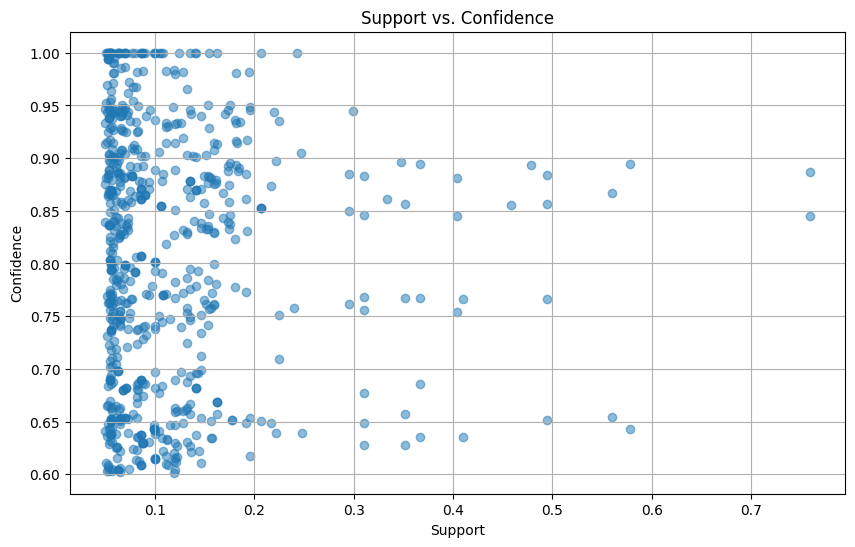

In [40]:
import matplotlib.pyplot as plt

# Assuming you have already generated association rules
# Replace 'rules' with your actual association rules

# Plot a scatterplot of support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()

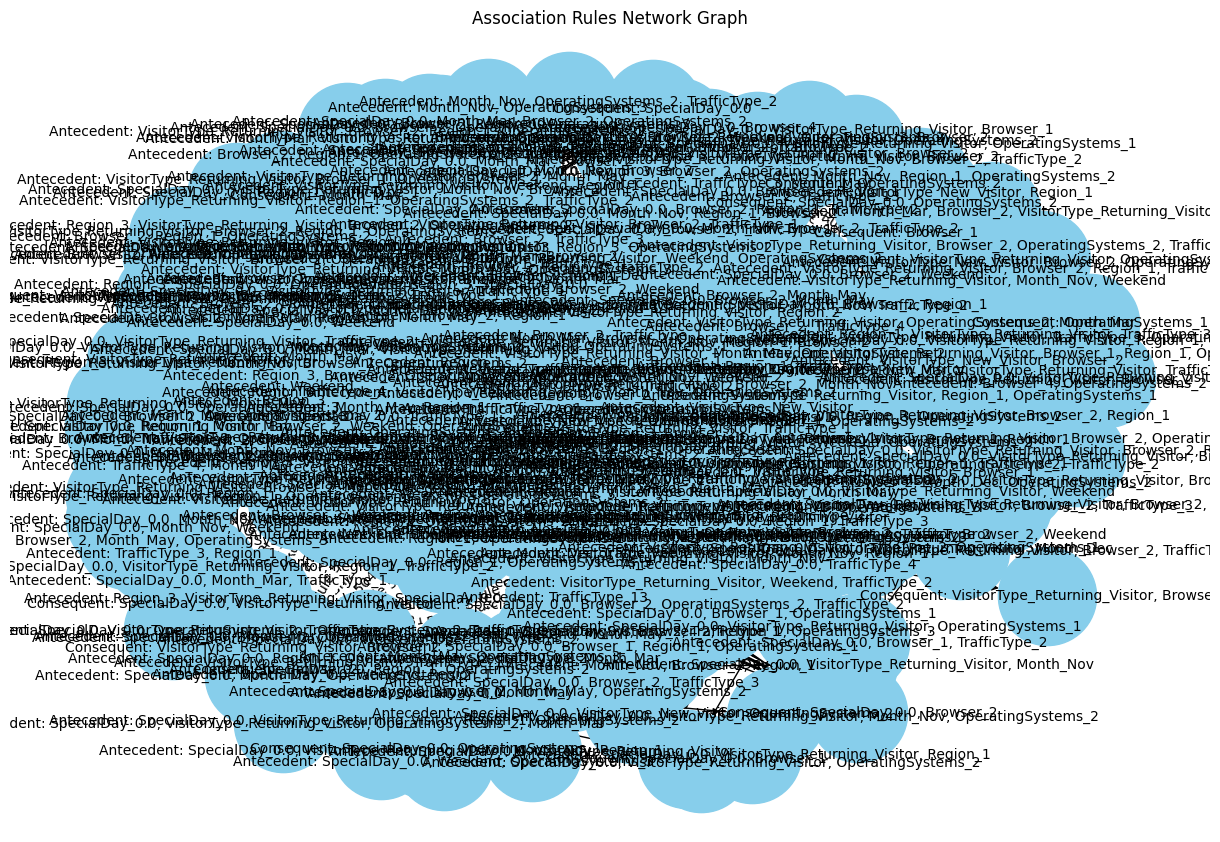

In [41]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents of each rule
for i, rule in enumerate(rules.iterrows()):
    antecedent = "Antecedent: " + ', '.join(rule[1]['antecedents'])
    consequent = "Consequent: " + ', '.join(rule[1]['consequents'])
    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, label=f"Rule {i + 1}")

# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Layout algorithm
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Association Rules Network Graph')
plt.show()
